In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import sentencepiece as spm
import math
import re
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import pandas as pd
import random

class
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
일반              800
Name: count, dtype: int64


C:\Users\C\AppData\Local\Temp\ipykernel_9176\1581036319.py:14: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\C\AppData\Local\Temp\ipykernel_9176\1581036319.py:14: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\C\AppData\Local\Temp\ipykernel_9176\1581036319.py:14: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\C\AppData\Local\Temp\ipykernel_9176\1581036319.py:14: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\C\AppData\Local\Temp\ipykernel_9176\1581036319.py:14: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\C\AppData\Local\Temp\ipykernel_9176\1581036319.py:14: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  pl

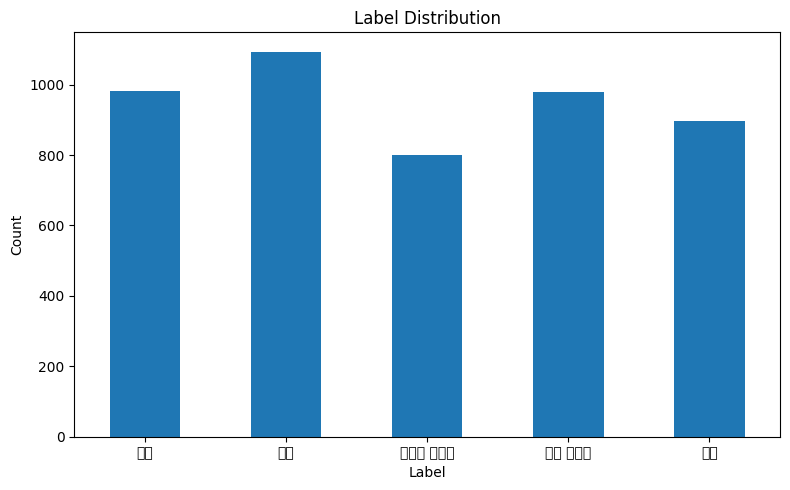

In [5]:
df = pd.read_csv('strage_1.csv')

# 레이블 분포 확인
print(df['class'].value_counts())

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
df['class'].value_counts().sort_index().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1, 2,3,4], ['협박','갈취','직장내 괴롭힘','기타 괴롭힘','일반'], rotation=0)
plt.tight_layout()
plt.show()

In [7]:
spm.SentencePieceTrainer.Train(
    input='strage_1.csv',
    model_prefix="ah_spm",
    vocab_size=30000,
    character_coverage=0.9995,
    model_type="bpe",  # 한국어면 unigram도 가능
    max_sentence_length=999999,

    # 특수 토큰 ID 설정
    pad_id=0,   # <pad>
    unk_id=1,   # <unk>
    bos_id=2,   # <s>
    eos_id=3,   # </s>

    # label을 포함한 사용자 정의 토큰
    user_defined_symbols=[
        '<협박>','<갈취>','<직장내 괴롭힘>','<기타 괴롭힘>','<일반>',
    ]
)


In [8]:
sp = spm.SentencePieceProcessor()
sp.Load("ah_spm.model")

True